<a href="https://colab.research.google.com/github/Gopikagovindan/assesment/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#importing packages
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Date & Time Libraries :
from datetime import datetime
import time

In [11]:
train = pd.read_csv('/content/train_ML_IOT.csv.zip')
test =  pd.read_csv('/content/test_ML_IOT.csv')
ss = pd.read_csv('/content/sample_submission_ML_IOT.csv')

In [13]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# sample_submission_ML_IOT.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/sample_submission_ML_IOT.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'sample_submission_ML_IOT.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 2 columns


In [14]:
df1.head(5)

,ID,Vehicles
0,20170701001,50
1,20170701011,50
2,20170701021,50
3,20170701031,50
4,20170701041,50


In [16]:
# Python Method 1 : Displays Data Information :

def display_data_information(data, data_types, dataframe_name):
    print(" Information of ",dataframe_name,": Rows = ",data.shape[0],"| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )        

# Display Data Information of "train" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(train, data_types, "Train")


 Information of  Train : Rows =  48120 | Columns =  4 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


3 int64 Features
Junction    int64
Vehicles    int64
ID          int64
dtype: object

1 object Features
DateTime    object
dtype: object



In [17]:
# Display Data Information of "test" :

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(test, data_types, "Test")

 Information of  Test : Rows =  11808 | Columns =  3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


2 int64 Features
Junction    int64
ID          int64
dtype: object

1 object Features
DateTime    object
dtype: object



In [18]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
#     return True

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "Train", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(train, head_rows=3, tail_rows=2)

'Data Head & Tail :'

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [19]:
# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)
# Pass Dataframe as "Test", No. of Rows in Head = 3 and No. of Rows in Tail = 2 :

display_head_tail(test, head_rows=3, tail_rows=2)


'Data Head & Tail :'

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
11806,2017-10-31 22:00:00,4,20171031224
11807,2017-10-31 23:00:00,4,20171031234


In [20]:
# Python Method 3 : Displays Data Description using Statistics :

def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
#     print("")
    display(data.describe( include = categorical_data_types))

# Display Data Description of "Train" :

display_data_description(train, data_types[0:4], data_types[4:7])

Data Description :


,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


,DateTime
count,48120
unique,14592
top,2017-03-01 17:00:00
freq,4


In [21]:
# Display Data Description of "Test" :

display_data_description(test, data_types[0:4], data_types[4:7])

Data Description :


,Junction,ID
count,11808.000000,1.180800e+04
mean,2.500000,2.017087e+10
std,1.118081,1.124665e+05
min,1.000000,2.017070e+10
25%,1.750000,2.017073e+10
50%,2.500000,2.017083e+10
75%,3.250000,2.017100e+10
max,4.000000,2.017103e+10


,DateTime
count,11808
unique,2952
top,2017-07-13 21:00:00
freq,4


In [22]:
# Checking Percentage(%) of Common ID's  between train and test data using Unique train values :

np.intersect1d(train['ID'], test['ID']).shape[0]/train['ID'].nunique()

# No Common ID - So Data Leak in ID Column - Good to Go !!!

0.0

In [23]:
# Dropping "ID" Columns in Train and Test :

train.drop(["ID"],axis = 1,inplace=True)

test_ID = test["ID"]
test.drop(["ID"],axis = 1,inplace=True)


In [24]:
# Remove Duplicate Rows from Train data if present :
# Python Method 4 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first", inplace=True) 
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    
    return data

# Remove Duplicates from "train" data :

train = remove_duplicate(train)

# No Duplicates are there to remove 

BEFORE REMOVING DUPLICATES - No. of Rows =  48120
AFTER REMOVING DUPLICATES  - No. of Rows =  48120


In [25]:
# Python Method 5 : Fills or Imputes Missing values with Various Methods : 

def fill_missing_values(data, fill_value, fill_types, columns, dataframe_name):
    
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display((data.isnull().sum()).sum())
    
    if (data.isnull().sum()).sum() != 0 :
    
        for column in columns :

            # Fill Missing Values with Specific Value :
            if "Value_Fill" in fill_types :
                data[ column ] = data[ column ].fillna(fill_value)
    #             print("Value_Fill")

            # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) :
            if "Forward_Fill" in fill_types :
                data[ column ] = data[ column ].ffill(axis = 0)
    #             print("Forward_Fill")

            # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) :
            if "Backward_Fill" in fill_types :
                data[ column ] = data[ column ].bfill(axis = 0)
    #             print("Backward_Fill")

        print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
        display(data.isnull().sum())
    
    return data

fill_types = [ "Forward_Fill"]
fill_value = 0

# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" : 
train = fill_missing_values(train, fill_value, fill_types, train.columns,"train")

# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" :
test  = fill_missing_values(test, fill_value, fill_types,train.columns,"test")

Missing Values BEFORE REMOVAL in  train  data


0

Missing Values BEFORE REMOVAL in  test  data


0

In [26]:
# Python Method 6 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")
        
# Displays Unique Values in Each Column of "Train" :

display_unique(train)

# Display this info in a Table Format

No of Unique Values in DateTime Column are : 14592
Actual Unique Values in DateTime Column are : ['2015-11-01 00:00:00' '2015-11-01 01:00:00' '2015-11-01 02:00:00' ...
 '2017-06-30 21:00:00' '2017-06-30 22:00:00' '2017-06-30 23:00:00']
NULL Values :
0
Value Counts :
2017-03-01 17:00:00    4
2017-01-07 17:00:00    4
2017-04-18 00:00:00    4
2017-01-28 19:00:00    4
2017-01-27 15:00:00    4
                      ..
2016-09-27 18:00:00    3
2016-01-05 03:00:00    3
2016-03-01 09:00:00    3
2016-04-13 13:00:00    3
2016-02-19 06:00:00    3
Name: DateTime, Length: 14592, dtype: int64

No of Unique Values in Junction Column are : 4
Actual Unique Values in Junction Column are : [1 2 3 4]
NULL Values :
0
Value Counts :
3    14592
2    14592
1    14592
4     4344
Name: Junction, dtype: int64

No of Unique Values in Vehicles Column are : 141
Actual Unique Values in Vehicles Column are : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27 

In [27]:
display_unique(test)

No of Unique Values in DateTime Column are : 2952
Actual Unique Values in DateTime Column are : ['2017-07-01 00:00:00' '2017-07-01 01:00:00' '2017-07-01 02:00:00' ...
 '2017-10-31 21:00:00' '2017-10-31 22:00:00' '2017-10-31 23:00:00']
NULL Values :
0
Value Counts :
2017-07-13 21:00:00    4
2017-10-31 21:00:00    4
2017-10-27 14:00:00    4
2017-08-03 06:00:00    4
2017-07-18 17:00:00    4
                      ..
2017-10-07 11:00:00    4
2017-10-16 00:00:00    4
2017-09-23 04:00:00    4
2017-07-31 00:00:00    4
2017-07-26 00:00:00    4
Name: DateTime, Length: 2952, dtype: int64

No of Unique Values in Junction Column are : 4
Actual Unique Values in Junction Column are : [1 2 3 4]
NULL Values :
0
Value Counts :
4    2952
3    2952
2    2952
1    2952
Name: Junction, dtype: int64



In [28]:
# Converting to datetime :

# filtering data greater than or equal to 01 Jan 2016
# train=train[train['DateTime']>='2016-01-01']

train['DateTime'] = pd.to_datetime(train['DateTime'])
test['DateTime'] = pd.to_datetime(test['DateTime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 184.6 KB


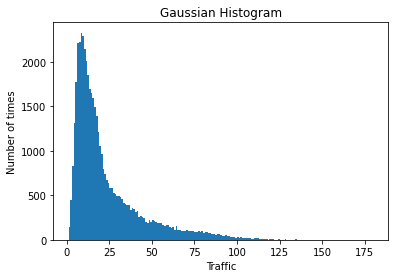

In [29]:
# Visualising the histogram for positive reviews only from train and dataset
data = train.Vehicles
binwidth = 1
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Traffic")
plt.ylabel("Number of times")
plt.show()

In [31]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [32]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [33]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [34]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [36]:
plotCorrelationMatrix(df1, 8)

No correlation plots shown: The number of non-NaN or constant columns (1) is less than 2


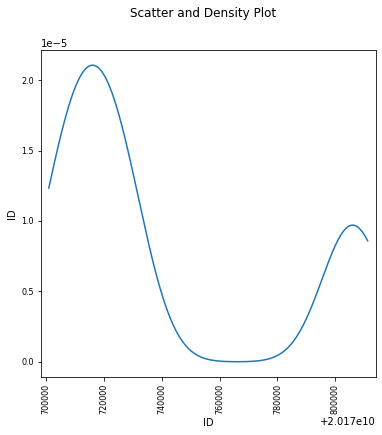

In [37]:
plotScatterMatrix(df1, 6, 15)

In [40]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# test_ML_IOT.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/test_ML_IOT.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'test_ML_IOT.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 3 columns


In [41]:
df2.head(5)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [42]:
#Distribution graphs (histogram/bar graph) of sampled columns:

plotPerColumnDistribution(df2, 10, 5)



<Figure size 2400x512 with 0 Axes>

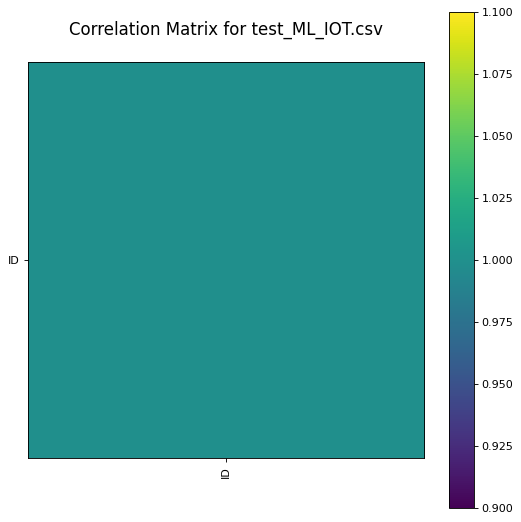

In [44]:
#Correlation matrix:

plotCorrelationMatrix(df2, 8)

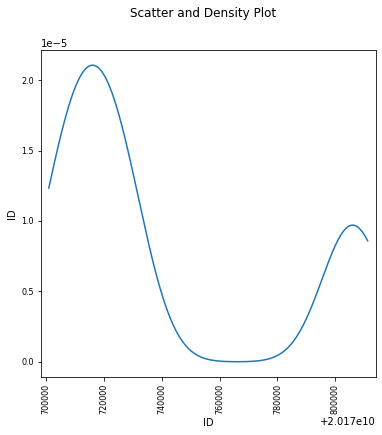

In [45]:
plotScatterMatrix(df2, 6, 15)

In [47]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# train_ML_IOT.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/content/train_ML_IOT.csv.zip', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'train_ML_IOT.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns
There are 1000 rows and 4 columns


In [48]:
df3.head(5)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


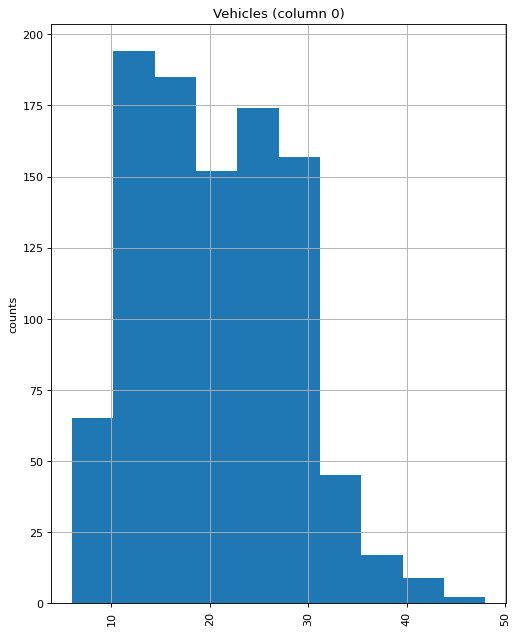

In [50]:
#Distribution graphs (histogram/bar graph) of sampled columns:

plotPerColumnDistribution(df3, 10, 5)

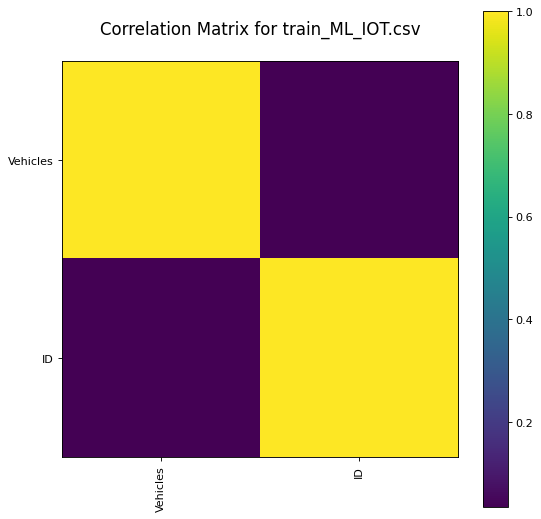

In [51]:
plotCorrelationMatrix(df3, 8)

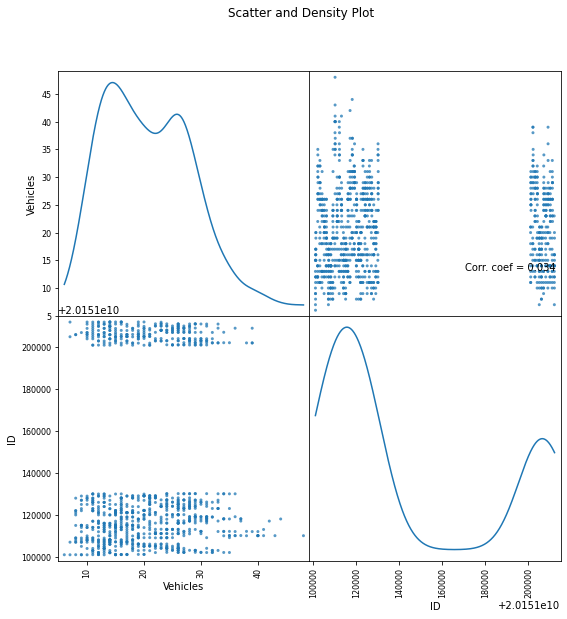

In [52]:
#Scatter and density plots:

plotScatterMatrix(df3, 9, 10)
